<input type="image" src="Images/banner.png" alt="Submit" width="1000" height="500">

# Imports:

In [1]:
# Machine Learning Libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import LabelEncoder # Label Encoder
from sklearn import preprocessing  #Preprocessing Library
from imblearn.over_sampling import SMOTE # SMOTE
from sklearn.model_selection import train_test_split # Train Test Split
from sklearn.preprocessing import MinMaxScaler # Min Max Scaler
from sklearn.model_selection import GridSearchCV #Grid Search
from sklearn.pipeline import make_pipeline #Pipeline
from sklearn.model_selection import KFold #K-Fold

# Evaluation Metrics
from sklearn.model_selection import cross_val_score # Cross Validation
from sklearn.metrics import classification_report # Classification Report
from sklearn.metrics import confusion_matrix # Confusion Matrix

# Data Visualization
import seaborn as sns # seaborn 
import matplotlib.pyplot as plt # matplotlib 
import plotly.express as px # Plotly

# Algorithms imports
from sklearn.linear_model import LogisticRegression # Logistic Regression
from sklearn.ensemble import RandomForestClassifier # Random Forest
from sklearn.neighbors import KNeighborsClassifier # KNN
from sklearn.naive_bayes import MultinomialNB # Naive Bayes

# allows plotyly graphs to be illustrated in the notebook. This solves the problem of not being able to see the plotly graphs in the notebook.
import plotly.io as pio #Plotly
pio.renderers.default = "notebook_connected"

# sets all graph backgrounds to white
plt.rcParams['figure.facecolor'] = 'white'

# Creating up the Dataset:

Task 2 requires a dataset of 500 000 records. To avoid long run times and meet the requirements of task 2, I have selected 500 000 records from the original dataset that contains 6.36 million records \
The original dataset only contains around 8000 fraudulent transactions, therefore to increase model accuracy I have selected all the fraudenlent transactions. \ 
Creating the dataset using the pandas shuffle method randomly selects records and decreases the number of fraudulent transactions.

In [2]:
# Import the raw data
raw_data = pd.read_csv('Fraud.csv')

In [3]:
# select all rows and columns where isFraud is 1
fraud = raw_data[raw_data['isFraud'] == 1]

# select all rows and columns where isFlaggedFraud is 1
flagged_fraud = raw_data[raw_data['isFlaggedFraud'] == 1]

# select all rows and columns where isFraud is 0
normal = raw_data[raw_data['isFraud'] == 0]


The dataset has been recreated selecting all the Fraud transactions first

In [4]:
# Display the shape of the data
fraud.shape, flagged_fraud.shape, normal.shape

((8213, 11), (16, 11), (6354407, 11))

The Original dataset contains:
<li> 8213 Fraud transactions </li>
<li> 16 large Fraud transactions </li>
<li> 6 354 407 Normal transactions </li>

In [5]:
# add only the fraud and flagged fraud rows to the dataset
data = fraud.append(flagged_fraud, ignore_index=True)

# add only 10% of the normal rows to the dataset
data = data.append(normal.sample(frac=0.1, random_state=42), ignore_index=True)

# shuffle the dataset
data = data.sample(frac=1).reset_index(drop=True)

# display the new dataset
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,330,PAYMENT,30889.58,C1426535174,0.00,0.00,M1438515760,0.00,0.00,0,0
1,259,PAYMENT,5389.25,C1919927633,0.00,0.00,M415805888,0.00,0.00,0,0
2,251,CASH_OUT,425931.90,C1098847235,0.00,0.00,C657752155,594627.43,1020559.33,0,0
3,181,CASH_IN,7989.04,C496376280,39672.00,47661.04,C1849204616,175298.62,167309.58,0,0
4,354,CASH_OUT,61138.95,C218082915,103285.71,42146.76,C2072288585,105022.74,166161.70,0,0


The new dataset has been created as variable data. \
All the columns from the original dataset are included in the new dataset.

In [6]:
# display the shape of the new dataset
data.shape

(643670, 11)

The dataset consists of 643 670 observations and 11 columns

In [7]:
# display information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 643670 entries, 0 to 643669
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            643670 non-null  int64  
 1   type            643670 non-null  object 
 2   amount          643670 non-null  float64
 3   nameOrig        643670 non-null  object 
 4   oldbalanceOrg   643670 non-null  float64
 5   newbalanceOrig  643670 non-null  float64
 6   nameDest        643670 non-null  object 
 7   oldbalanceDest  643670 non-null  float64
 8   newbalanceDest  643670 non-null  float64
 9   isFraud         643670 non-null  int64  
 10  isFlaggedFraud  643670 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 54.0+ MB


The dataset consists of:
<li> Three integers: step, isFraud, isFlaggedFraud</li>
<li> Three objects: type, nameOrig, nameDest</li>
<li> Five Floats: amount, oldbalanceOrg, newbalanceOrig, oldbalanceDest, newbalanceDest</li>


# Exporatory Data Analysis:

In [8]:
# distribution of transaction type
type = data.type.value_counts()
transuction = type.index
quantity = type.values

# draw pie circule with plotly
figure = px.pie(data,
                values = quantity,
                names = transuction,
                hole = .5,
                title = 'Distribution of Transaction Type')

figure.show()

The Pie chart illustrates the distribution of transaction type:
<li> 35,3% of transactions are Cash_Out </li>
<li> 33,4% of transactions are Payment </li>
<li> 21,8% of transactions are Cash_In </li>
<li> 8,84% of transactions are Transfer </li>
<li> 0,635% of transactions are Debit </li>

Definitions of Payment types:
<li> Cash-In: is the process of increasing the balance of account by paying in cash to a merchant. </li>
<li> Cash-Out: is the opposite of Cash-In, it means to withdraw cash from a merchant which decreases the balance of the account. </li>
<li> Debit: is similar process than CASH-OUT and involves sending the money from the mobile money service to a bank account. </li>
<li> Payment: refers to the process of paying for goods or services to merchants which decreases the balance of the account and increases the balance of the receiver.</li>
<li> Transfer is the process of sending money to another user of the service through the mobile money platform. </li>

All definitions are from the following source: \
https://www.researchgate.net/publication/313138956_PAYSIM_A_FINANCIAL_MOBILE_MONEY_SIMULATOR_FOR_FRAUD_DETECTION

In [9]:
# Counts the number of normal and fraud transactions per type
values = data.groupby(['type','isFraud']).size().reset_index(name='counts')
print(values)

       type  isFraud  counts
0   CASH_IN        0  140099
1  CASH_OUT        0  223243
2  CASH_OUT        1    4116
3     DEBIT        0    4085
4   PAYMENT        0  215258
5  TRANSFER        0   52756
6  TRANSFER        1    4113


The only transaction types that contain fraudulent transactions are: Cash_Out and Transfer


<AxesSubplot:title={'center':'Number of Transactions per Type'}, xlabel='type', ylabel='count'>

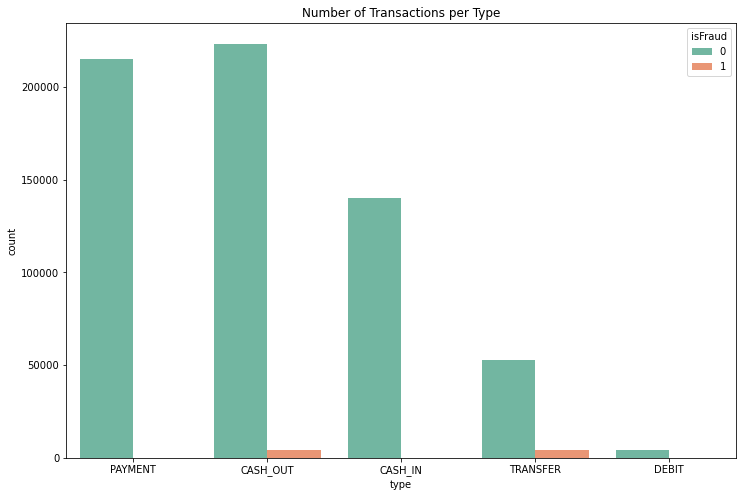

In [10]:
# counting the number of transactions per type
plt.figure(figsize=(12,8))
plt.title('Number of Transactions per Type')
sns.countplot(x="type", data=data,hue="isFraud" , palette="Set2")

The countplot above illustrates the number of normal transactions and fraudulent transactions per type. \
The most common transaction type is: Cash_out. Followed by: Payment, Cash_In, Transfer, Debit \
The transaction type with the most fraudulent transactions is: Cash_Out then Transfer

This graph also identifies a possible trend of fraudulent actions: \
TRANSFER and CASH_OUT share a similiar number of fraudulent transactions, therefore a trend is noticeable. \
When we look at the concepts of TRANSFER and CASH_OUT it makes sense, a malicious attacker is most likely transfering the money between accounts and then withdrawing the money.

In [11]:
# distribution of transaction type
fraud = data.isFraud.value_counts()
transuction = fraud.index
quantity = fraud.values

# draw pie circule with plotly
figure = px.pie(data,
                values = quantity,
                names = transuction,
                hole = .5,
                title = 'Distribution of Fraud')
figure.show()

The dataset is clearly unbalanced, it consists of 98,7% normal transactions and 1,28% fraud transactions. \
This means SMOTE should be used to combat overfitting and underfitting.

<AxesSubplot:title={'center':'Correlation between the variables with the target variable'}>

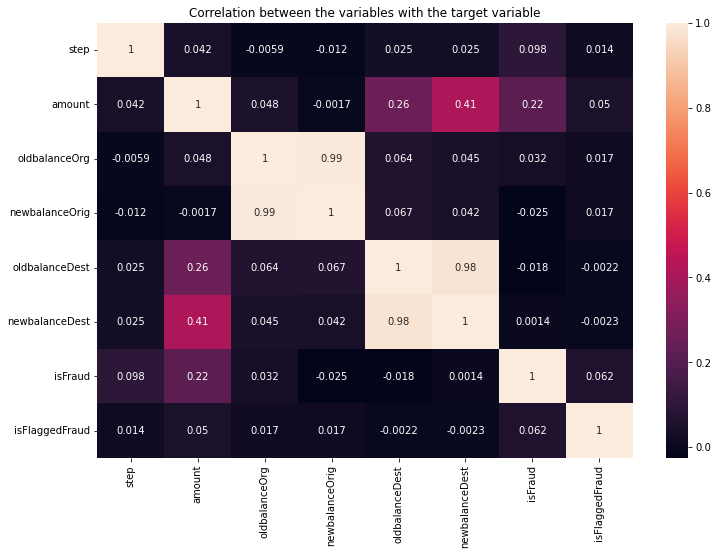

In [12]:
# heatmap of the correlation between the variables with the target variable
plt.figure(figsize=(12,8))
plt.title('Correlation between the variables with the target variable')
sns.heatmap(data.corr(), annot=True)

The heatmap illustrates: 
<li> No single variable has a very strong correlation with isFraud or isFlaggedFraud. This means that all the variables share similiar weightings </li>
<li> There is a strong positive correlation between: oldbalanceOrg and newbalanceOrig, oldbalanceDest and newbalanceDest</li>
<li> There is a weak positive correlation between: amount and newbalanceDest , amount and oldbalanceDest </li>

The dataset consists of data of transactions, therefore it is normal for there to be a strong correlation between oldbalanceOrg and newbalanceOrig, oldbalanceDest and newbalanceDest. \
This is due to how online transactions work. 

Something interesting to note is the correlation between amount and newbalanceDest , amount and oldbalanceDest. \
It may be possible to identify a trend of fraudulent transactions if the fraudulent transactions are similiar amounts going to similar desitinations. 

# Feature Engineering:

In [13]:
# Checking for missing values
data = data.dropna()
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

The dataset consists of no null values

In [14]:
# One Hot Encoding
encoder = {}
for i in data.select_dtypes('object').columns:
    encoder[i] = LabelEncoder()
    data[i] = encoder[i].fit_transform(data[i])

# display the dataset
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,330,3,30889.58,142191,0.00,0.00,295413,0.00,0.00,0,0
1,259,3,5389.25,306720,0.00,0.00,396770,0.00,0.00,0,0
2,251,1,425931.90,33068,0.00,0.00,202891,594627.43,1020559.33,0,0
3,181,0,7989.04,475286,39672.00,47661.04,108189,175298.62,167309.58,0,0
4,354,1,61138.95,383117,103285.71,42146.76,136716,105022.74,166161.70,0,0


The dataset has been encoded to only consists of numerical values. \
One-hot encoding will increase the models accuracy due to the dataset being nomralized.

## Confusion Matrix after Feautre Engineering:

<AxesSubplot:title={'center':'Correlation between the variables with the target variable'}>

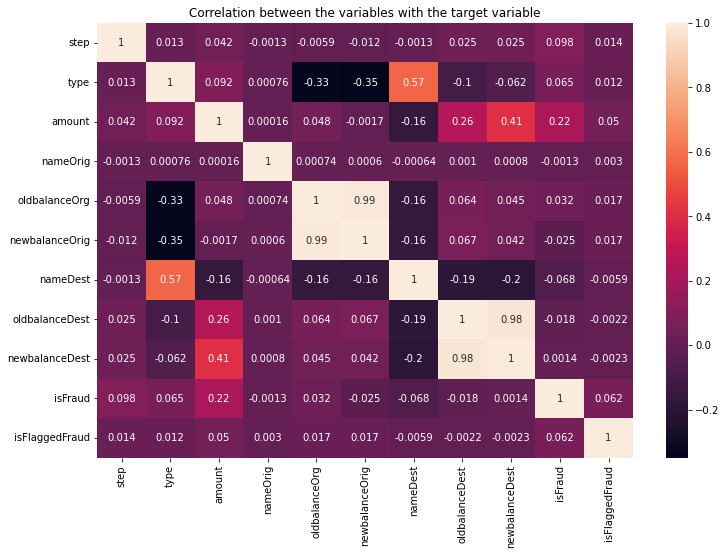

In [15]:
# heatmap of the correlation between the variables with the target variable
plt.figure(figsize=(12,8))
plt.title('Correlation between the variables with the target variable')
sns.heatmap(data.corr(), annot=True)

The heatmap above illustates:
<li> Majority of the columns are the same but three new columns (type, nameOrig, nameDest) have been added after performing one-hot encoding </li>
<li> The only noticable correlation from the new columns is: type and nameDest</li>
This correlation can be due to the nature of system being transactions, only certain types of transactions may be accepted by certain systems (nameDest) for example: ATMs do not accept paypal

# Building the Model:

In [16]:
# Split the data into features and target
X = data.drop(columns=['isFraud', 'isFlaggedFraud'])
y = data['isFraud']

The train variable is all the columns in the dataset except isFraud and IsFlaggedFraud. \
The target variable is isFraud

Please note: \
I have decided to drop the isFlaggedFraud column.
This was due to a logical error I noticed in the dataset, the isFlaggedFraud variable is set to automatically flag large transaction of over 200 000. \
The flaw in this column is that the dataset contains normal transactions of over 200 000 that are not flagged as fraud in both columns (isFraud and isFlaggedFraud). \
To avoid this causing inaccuracies in my model, I have decided to rather drop the column

In [17]:
# Count the number of fraud and normal transactions
y.value_counts()

0    635441
1      8229
Name: isFraud, dtype: int64

The dataset has been split and it consists of very unbalance samples

In [18]:
# SMOTE
over_sample = SMOTE(random_state=42)
X,y = over_sample.fit_resample(X,y)

In [19]:
# Resampled data count
y.value_counts()

0    635441
1    635441
Name: isFraud, dtype: int64

The dataset has been resampled and consists of 635 441 normal and fraudulent transactions.

In [20]:
# MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

To increase the models accuracy, it is important to decrease the data's dimensionality by using the MinMaxScaler. \
This will scale down the values and make it easier for the model to process

In [21]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

The dataset has been split into 80% train data and 20% test data. \
This split was chosen due to the large size of the dataset.

# Logistic Regression from Scratch:

In [22]:
# Sigmoide Function
def sigmoid(x):
    return 1/(1+np.exp(-x))

# Logistic Regression from scratch
class LogisticRegressionFromScratch():
    # Constructor that initializes the class and parameters
    def __init__(self, lr=0.001, n_iters=2500):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    # Method that fits the model
    def fit(self, X, y):
        # init parameters
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        # gradient descent
        for _ in range(self.n_iters):   
            # linear model
            linear_pred = np.dot(X, self.weights) + self.bias
            predictions = sigmoid(linear_pred)
            # compute gradients
            dw = (1/n_samples) * np.dot(X.T, (predictions - y))
            db = (1/n_samples) * np.sum(predictions-y)
            # update parameters
            self.weights = self.weights - self.lr*dw
            self.bias = self.bias - self.lr*db

    # Predict function
    def predict(self, X):
        linear_pred = np.dot(X, self.weights) + self.bias
        y_pred = sigmoid(linear_pred)
        class_pred = [0 if y<=0.5 else 1 for y in y_pred]
        return class_pred

# I do not take credit for this method and I used the youtube video below as a reference
# Reference: https://youtu.be/YYEJ_GUguHw

The logistic Regression from scratch method has been implemented in a class to ensure the variables within the method remain isolated. \
This helps with processing the data as the variables are only stored when needed.

In [23]:
# Logistic Regression Prediction
clf = LogisticRegressionFromScratch(lr=0.01)#NB default lr is worse 
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)

In [24]:
# Accuracy Score method
def accuracy(y_pred, y_test):
    return np.sum(y_pred==y_test)/len(y_test)

In [25]:
# Accuracy Score
acc = accuracy(y_pred, y_test)
print(acc)

0.7586799749780665


The Logistic Regression from Scratch model performed decently with an accuracy of 76.04%

## Hypertuning the Learning Rate:

learning rate is:  0.5
Accuracy: 0.7694519960499967
-------------------------------------------------------
learning rate is:  0.6
Accuracy: 0.7713089697336896
-------------------------------------------------------
learning rate is:  0.7
Accuracy: 0.7731344692871502
-------------------------------------------------------
learning rate is:  0.9
Accuracy: 0.7763212249731486
-------------------------------------------------------


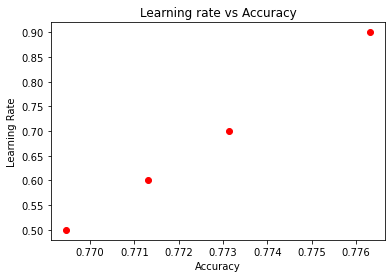

In [26]:
# tests the model using different learning rates
learning_rates = [0.5, 0.6, 0.7, 0.9]
models = {}
for i in learning_rates:
    print ("learning rate is: ",i)
    clf2 = LogisticRegressionFromScratch(lr=i)
    clf2.fit(x_train,y_train)
    models[i] = clf2.predict(x_test)
    # print each learning rate value and its accuracy score
    print ("Accuracy:", accuracy(models[i], y_test))
    print ("-------------------------------------------------------")

# create line plot for each learning rate value and its accuracy score
for i in learning_rates:
    temp_acc = accuracy(models[i], y_test)
    plt.plot(temp_acc,i, 'ro')
plt.xlabel('Accuracy')
plt.ylabel('Learning Rate')
plt.title('Learning rate vs Accuracy')
plt.show()


To Hypertune the Logistic Regression from Scratch model, I have tested different learning rates to identify the best learning rate. \
The best learning rate is 0,5. Increasing the learning rate anymore may increase noise and make the model prone to overfitting. 

Please note:
To avoid overfitting it is better to keep the learning rate below 1.0. Increases the Learning rate to anything equal or above will create noise.

## Evaluating the Model:

In [27]:
# Classification Report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.78      0.76    126988
           1       0.77      0.73      0.75    127189

    accuracy                           0.76    254177
   macro avg       0.76      0.76      0.76    254177
weighted avg       0.76      0.76      0.76    254177



The Logistic Regression from Scratch model performed decently with an f1-score of 0,77 for normal transactions and 0,75 for fraudulent transactions. \
This means that the model was able to identify the underlying trends and patterns of the data

### Confusion Matrix:

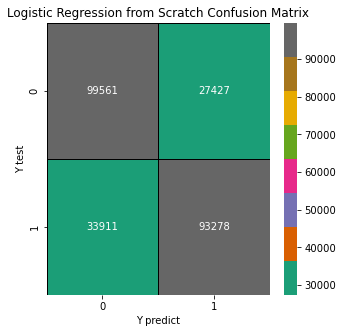

In [28]:
# confusion matrix method
logreg_val = confusion_matrix(y_test, y_pred)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(logreg_val, annot=True, linewidth=0.7, linecolor='black', fmt='g', ax=ax, cmap="Dark2")
plt.title('Logistic Regression from Scratch Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()

The Logistic Regression from Scratch model predicted:
<li> 99 657 true positives and 27 324 false positives </li>
<li> 93 640 true negatives and 33 556 false negatives</li>


## Predictions:

In [29]:
# Creates dataframe with actual values from the dataset of one fraud transaction and one normal transaction
pred_colum = ['step','type','amount','nameOrig','oldbalanceOrg','newbalanceOrig','nameDest','oldbalanceDest','newbalanceDest']
not_fraud = [1,'PAYMENT',9839.64,'C1231006815',170136.0,160296.36,'M1979787155',0.0,0.0]
is_fraud = [1,'TRANSFER',181.0,'C1305486145',181.0,0.0,'C553264065',0.0,0.0]
pred_data = pd.DataFrame(columns=pred_colum)
pred_data.loc[0] = not_fraud
pred_data.loc[1] = is_fraud
pred_data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0
1,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0


In [30]:
# One Hot Encoding
encoder = {}
for i in pred_data.select_dtypes('object').columns:
    encoder[i] = LabelEncoder()
    pred_data[i] = encoder[i].fit_transform(pred_data[i])

# display the dataset
pred_data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest
0,0,0,9839.64,0,170136.0,160296.36,1,0.0,0.0
1,0,1,181.00,1,181.0,0.00,0,0.0,0.0


In [31]:
# MinMaxScaler
pred_data = scaler.fit_transform(pred_data)

In [32]:
# Predict the data
user_pred = clf.predict(pred_data)

# Display the prediction for normal transaction
print('Normal transaction predict: ' + str(user_pred[0]))
if user_pred[0] == 0:
    print('Normal transaction was predicted correctly')
else:
    print('Normal transaction was predicted incorrectly')

# Display the prediction for fraud transaction
print('Fraud transaction predict: ' + str(user_pred[1]))
if user_pred[1] == 1:
    print('Fraud transaction was predicted correctly')
else:
    print('Fraud transaction was predicted incorrectly')


Normal transaction predict: 0
Normal transaction was predicted correctly
Fraud transaction predict: 1
Fraud transaction was predicted correctly


The Logistic Regression from Scratch model was successfully able to predict a user inputted normal transaction and a fraudulent transaction

# Investigating other Classification Algorithms:

In [33]:
#Ignore warnings
import warnings #Warning Library
warnings.filterwarnings('ignore') #Ignore Warnings

The code above is used to hide the warnings that are displayed in the output. \
The method below to compare the different algorithm generates many warnings that take up unneccessary screen space. \
Ignoring the warnings do not affect the model performance, therefore I have just hide them.

In [34]:
# creates Folds
kf = KFold(n_splits=3, shuffle=True, random_state=42)

# Arrays to hold the scores 
xyz=[]
accuracy=[]
std=[]
classifiers=['Logistic Regression',
             'Random Forest',
             'MnB',
             'KNeighbors']

# Variable to hold model names
models=[LogisticRegression(),
        RandomForestClassifier(),
        MultinomialNB(),
        KNeighborsClassifier()]

# for loop to iterate through the models and get the scores and standard deviation
for i in models:
    model = i
    cv_result = cross_val_score(model,X,y, cv = kf,scoring = "accuracy")
    cv_result=cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)

# Stores the scores in a dataframe
models_dataframe2=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)       
models_dataframe2

,CV Mean,Std
Logistic Regression,0.865233,0.000290
Random Forest,0.998481,0.000072
MnB,0.783381,0.000320
KNeighbors,0.919466,0.000104


After testing four different classification algorithms the best algorithm is the Random Forest classifier with an very good accuracy of 99.8%. \
The Sklearn Logistic Regression algorithm outperformed my Logistic Regression from Scratch algorithm

## Logistic Regression using Sklearn Library:

In [35]:
# Pipeline for Logistic Regression and best Hyperparameters
param_grid = {'C': np.logspace(-4, 4, 50)}

# creates a pipeline with the best hyperparameters
pipeline = make_pipeline(GridSearchCV(LogisticRegression(random_state=42), param_grid, verbose=0, cv = 3, refit = True))

# fit the pipeline and predict the data
pipeline.fit(x_train, y_train)
prediction = pipeline.predict(x_test)
# Accuracy Score
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(pipeline.score(x_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.92


The logistic Regression using Sklearn model with tuned hyperparameters acheived an accuracy of 92%. \
It out performed the Logistic Regression from Scratch model by 15%.

In [36]:
# Classification Report
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.90      0.95      0.92    126988
           1       0.95      0.90      0.92    127189

    accuracy                           0.92    254177
   macro avg       0.92      0.92      0.92    254177
weighted avg       0.92      0.92      0.92    254177



The Logistic Regression using Sklearn model performed better than the Logistic Regression from Scratch Model. \
It has an f1-score of 0,93 for normal transactions and 0,92 for fraudulent transactions. \
This means that this model was better at identifying the underlying trends and patterns of the data

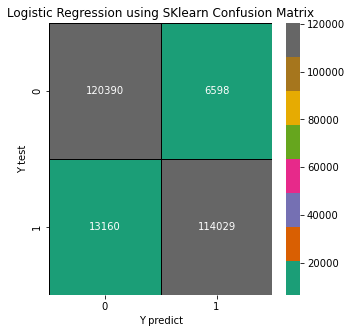

In [37]:
# confusion matrix method
logreg_val1 = confusion_matrix(y_test, prediction)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(logreg_val1, annot=True, linewidth=0.7, linecolor='black', fmt='g', ax=ax, cmap="Dark2")
plt.title('Logistic Regression using SKlearn Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()

The Logistic Regression using Sklearn model predicted:
<li> 120 108 true positives and 6861 false positives </li>
<li> 113 647 true negatives and 13 561 false negatives</li>

## Prediction using Sklearn Logistic Regression:

In [38]:
# Creates dataframe with actual values from the dataset of one fraud transaction and one normal transaction
logreg_pred_colum = ['step','type','amount','nameOrig','oldbalanceOrg','newbalanceOrig','nameDest','oldbalanceDest','newbalanceDest']
logreg_not_fraud = [1,'PAYMENT',9839.64,'C1231006815',170136.0,160296.36,'M1979787155',0.0,0.0]
logreg_is_fraud = [1,'TRANSFER',181.0,'C1305486145',181.0,0.0,'C553264065',0.0,0.0]
#create dataframe
logreg_pred_data = pd.DataFrame(columns=logreg_pred_colum)
logreg_pred_data.loc[0] = logreg_not_fraud
logreg_pred_data.loc[1] = logreg_is_fraud
logreg_pred_data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0
1,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0


In [39]:
# One Hot Encoding
encoder = {}
for i in logreg_pred_data.select_dtypes('object').columns:
    encoder[i] = LabelEncoder()
    logreg_pred_data[i] = encoder[i].fit_transform(logreg_pred_data[i])

# display the dataset
logreg_pred_data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest
0,0,0,9839.64,0,170136.0,160296.36,1,0.0,0.0
1,0,1,181.00,1,181.0,0.00,0,0.0,0.0


In [40]:
# MinMaxScaler
logreg_pred_data = scaler.fit_transform(logreg_pred_data)

In [41]:
# Predict the data
logreg_user_pred = clf.predict(logreg_pred_data)

# Display the prediction for normal transaction
print('Normal transaction predict: ' + str(logreg_user_pred[0]))
if logreg_user_pred[0] == 0:
    print('Normal transaction was predicted correctly')
else:
    print('Normal transaction was predicted incorrectly')

# Display the prediction for fraud transaction
print('Fraud transaction predict: ' + str(logreg_user_pred[1]))
if logreg_user_pred[1] == 1:
    print('Fraud transaction was predicted correctly')
else:
    print('Fraud transaction was predicted incorrectly')

Normal transaction predict: 0
Normal transaction was predicted correctly
Fraud transaction predict: 1
Fraud transaction was predicted correctly


The Logistic Regression using Sklearn model was successfully able to predict a user inputted normal transaction and a fraudulent transaction

## Random Forest Classifier using Sklearn Library:

In [42]:
# Random Forest and best Hyperparameters
randomForest = RandomForestClassifier(random_state=42)
# fit the pipeline and predict the data
randomForest.fit(x_train, y_train)
prediction2 = randomForest.predict(x_test)

# Accuracy Score
print('Accuracy of Random Forest classifier on test set: {:.2f}'.format(randomForest.score(x_test, y_test)))

Accuracy of Random Forest classifier on test set: 1.00


The Random Forest Classifier was the best performing model and performed the best without tuning the hyper parameter. \
It acheived an accuracy of 100%. \
This means that the model was able to perfectly identify the underlying patterns and trends of the data.

In [43]:
# Classification Report
print(classification_report(y_test,prediction2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    126988
           1       1.00      1.00      1.00    127189

    accuracy                           1.00    254177
   macro avg       1.00      1.00      1.00    254177
weighted avg       1.00      1.00      1.00    254177



The Random Forest model performed better than the Logistic Regression using Sklearn Model. \
It has an f1-score of 1 for normal transactions and 1 for fraudulent transactions. \
This means that this model was better at identifying the underlying trends and patterns of the data

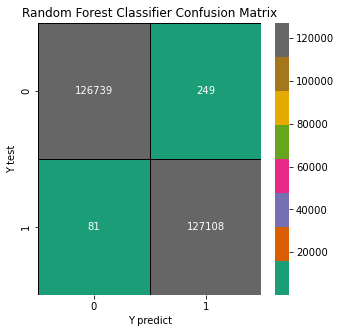

In [44]:
# confusion matrix method
randomforest_val = confusion_matrix(y_test, prediction2)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(randomforest_val, annot=True, linewidth=0.7, linecolor='black', fmt='g', ax=ax, cmap="Dark2")
plt.title('Random Forest Classifier Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()

The Random Forest Classifier model predicted:
<li> 126 711 true positives and 258 false positives </li>
<li> 127 123 true negatives and 85 false negatives</li>

### Prediction using Random Forest Classifier:

In [45]:
# Creates dataframe with actual values from the dataset of one fraud transaction and one normal transaction
forest_pred_colum = ['step','type','amount','nameOrig','oldbalanceOrg','newbalanceOrig','nameDest','oldbalanceDest','newbalanceDest']
forest_not_fraud = [1,'PAYMENT',9839.64,'C1231006815',170136.0,160296.36,'M1979787155',0.0,0.0]
forest_is_fraud = [1,'TRANSFER',181.0,'C1305486145',181.0,0.0,'C553264065',0.0,0.0]
#create dataframe
forest_pred_data = pd.DataFrame(columns=forest_pred_colum)
forest_pred_data.loc[0] = forest_not_fraud
forest_pred_data.loc[1] = forest_is_fraud
forest_pred_data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0
1,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0


In [46]:
# One Hot Encoding
encoder = {}
for i in forest_pred_data.select_dtypes('object').columns:
    encoder[i] = LabelEncoder()
    forest_pred_data[i] = encoder[i].fit_transform(forest_pred_data[i])

# display the dataset
forest_pred_data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest
0,0,0,9839.64,0,170136.0,160296.36,1,0.0,0.0
1,0,1,181.00,1,181.0,0.00,0,0.0,0.0


In [47]:
# MinMaxScaler
forest_pred_data = scaler.fit_transform(forest_pred_data)

In [48]:
# Predict the data
forest_user_pred = clf.predict(forest_pred_data)

# Display the prediction for normal transaction
print('Normal transaction predict: ' + str(forest_user_pred[0]))
if forest_user_pred[0] == 0:
    print('Normal transaction was predicted correctly')
else:
    print('Normal transaction was predicted incorrectly')

# Display the prediction for fraud transaction
print('Fraud transaction predict: ' + str(forest_user_pred[1]))
if forest_user_pred[1] == 1:
    print('Fraud transaction was predicted correctly')
else:
    print('Fraud transaction was predicted incorrectly')

Normal transaction predict: 0
Normal transaction was predicted correctly
Fraud transaction predict: 1
Fraud transaction was predicted correctly


The Random Forest Classifier model was successfully able to predict a user inputted normal transaction and a fraudulent transaction

# Conclusion:

The dataset consisted of 6.35 million transactions, containing non-fraudulent and fraudulent transactions. \
The dataset used to train the model is a subset of 635 000 records, this is to meet the task 2 requirements while still keeping runtime low. \
All the feratures were included in the training of the model (except isFlaggedFraud), this increased the model's accruacys. \
The Logistic Regression from Scratch model was the worst performing model with 77% accuracy while the Random Forest Classifier was the best model with an accuracy of 100%. \
Each model was evaulated using test data that was kept seperate during training, the Random Forest Classifier still receveid an accuracy of 100%. \
To confirm the evaulation was done correctly, user inputted data was tested and the model made correct predictions for both fraudulent and non-fraudulent transactions. \
To conclude, the dataset is appropriate for Logistic Regression and can be used to successfully identify fraudulent transactions.
